In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [29]:
def get_min_max_ranges(arr1,arr2,arr3):
    return [np.min(arr1[arr1>0]),np.min(arr2[arr2>0]),np.min(arr3[arr3>0])],[np.max(arr1[arr1>0]),np.max(arr2[arr2>0]),np.max(arr3[arr3>0])]
def get_binary_mask(bgr_img,param=None):
#     plt.figure(figsize=(10,9))

    ret, mask = cv2.threshold(bgr_img, 1, 255, cv2.THRESH_BINARY)
#     mask=cv2.inRange(bgr_img,0,255)
#     plt.imshow(mask)
#     plt.show()
    
    if param=="morph":
        
#         kernel = np.ones((4,4),np.uint8)
#         mask = cv2.erode(mask,kernel,iterations = 4)
        kernel = np.ones((4,4),np.uint8)
#         mask = cv2.dilate(mask,kernel,iterations = 4)
        mask = cv2.morphologyEx(bgr_img, cv2.MORPH_CLOSE, kernel,iterations=4)

    
#         mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel,iterations=5)
#     plt.figure(figsize=(10,9))
#     plt.imshow(mask)
#     plt.show()
#     print(mask.shape)
    return cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    return mask

In [17]:
def seg_skin(param=None):
    min_ranges_bgr=[]
    max_ranges_bgr=[]
    min_ranges_hsv=[]
    max_ranges_hsv=[]
    for img in glob.glob("Images/Ground Truths/*.jpg"):
#         plt.figure(figsize=(10,9))

        
        bgr_img=cv2.imread(img)
#         plt.imshow(bgr_img)
#         plt.show()
        binary_mask=get_binary_mask(bgr_img,param)
        
        bgr_img=cv2.bitwise_and(bgr_img,bgr_img,mask=binary_mask)
#         plt.figure(figsize=(20,9))
#         plt.imshow(bgr_img)

        b,g,r=cv2.split(bgr_img)



        min_range,max_range=get_min_max_ranges(b,g,r)
        min_ranges_bgr.append(min_range)
        max_ranges_bgr.append(max_range)

        hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
        h,s,v=cv2.split(hsv_img)
        min_range,max_range=get_min_max_ranges(h,s,v)
        min_ranges_hsv.append(min_range)
        max_ranges_hsv.append(max_range)

    #     plt.imshow(rgb_img)
    #     plt.show()
    min_ranges_bgr=np.array(min_ranges_bgr)
    max_ranges_bgr=np.array(max_ranges_bgr)
    min_ranges_hsv=np.array(min_ranges_hsv)
    max_ranges_hsv=np.array(max_ranges_hsv)


    max_bgr_skin_range=np.min(max_ranges_bgr,axis=0)
    min_bgr_skin_range=np.max(min_ranges_bgr,axis=0)
    max_hsv_skin_range=np.min(max_ranges_hsv,axis=0)
    min_hsv_skin_range=np.max(min_ranges_hsv,axis=0)
    
#     max_hsv_skin_range[2]=178
#     min_hsv_skin_range[2]=1
    print("Max bgr skin range",max_bgr_skin_range)
    print("Min bgr skin range",min_bgr_skin_range)
    print("Max hsv skin range",max_hsv_skin_range)
    print("Min hsv skin range",min_hsv_skin_range)
    
    #prediction on original images
    for img in glob.glob("Images/Original Images/*.jpg"):
        plt.figure(figsize=(20,9))

        bgr_img=cv2.imread(img)
        plt.subplot(141)
        bgr_mask=cv2.inRange(bgr_img,min_bgr_skin_range,max_bgr_skin_range)
        print(bgr_mask.shape)
        plt.imshow(bgr_mask)
        
        masked_bgr=cv2.bitwise_and(bgr_img,bgr_img,mask=bgr_mask)
        plt.subplot(142)

        plt.imshow(cv2.cvtColor(masked_bgr,cv2.COLOR_BGR2RGB))
        hsv_img=cv2.cvtColor(masked_bgr,cv2.COLOR_BGR2HSV)
        hsv_mask=cv2.inRange(bgr_img,min_hsv_skin_range,max_hsv_skin_range)
        masked_hsv=cv2.bitwise_and(hsv_img,hsv_img,mask=hsv_mask)
        
        plt.subplot(143)
        plt.imshow(hsv_mask)
        plt.subplot(144)
        plt.imshow(cv2.cvtColor(masked_hsv,cv2.COLOR_HSV2RGB))

        plt.show()


Max bgr skin range [115 165 180]
Min bgr skin range [1 1 1]
Max hsv skin range [178 255 180]
Min hsv skin range [ 1 10  2]
(768, 512)


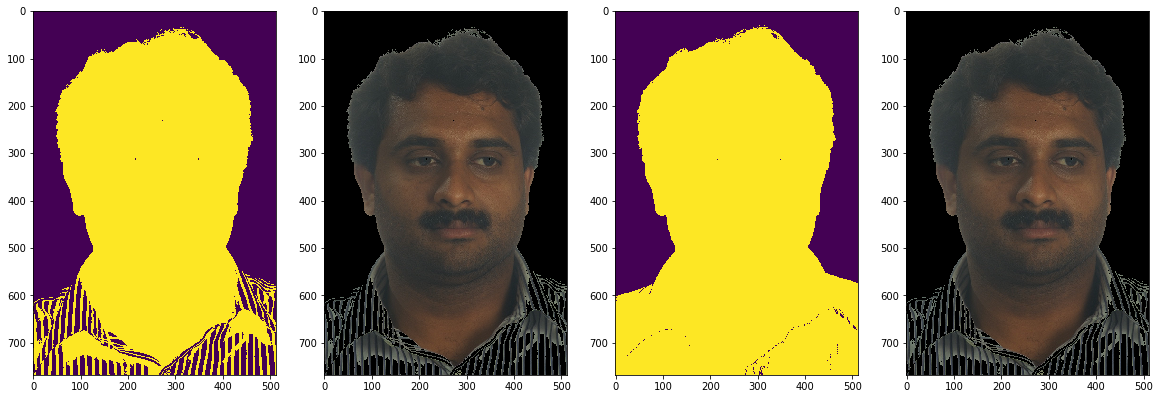

(768, 512)


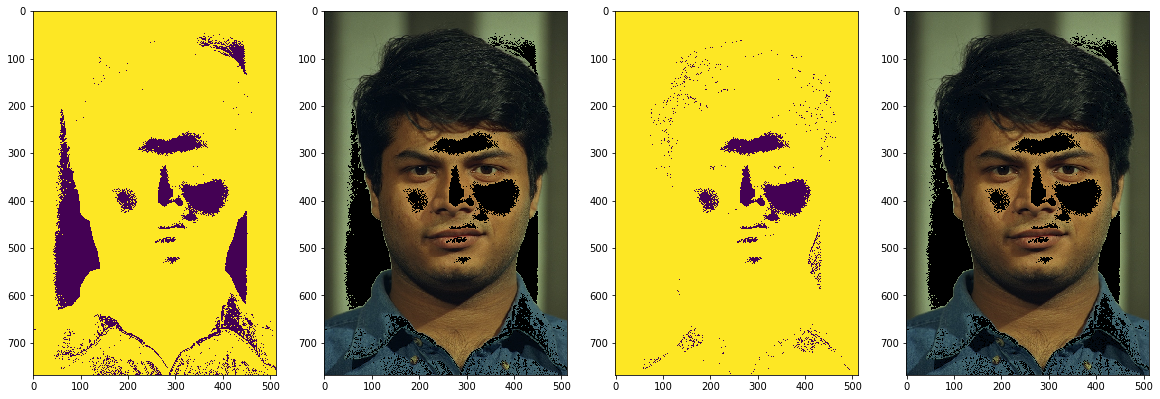

(768, 512)


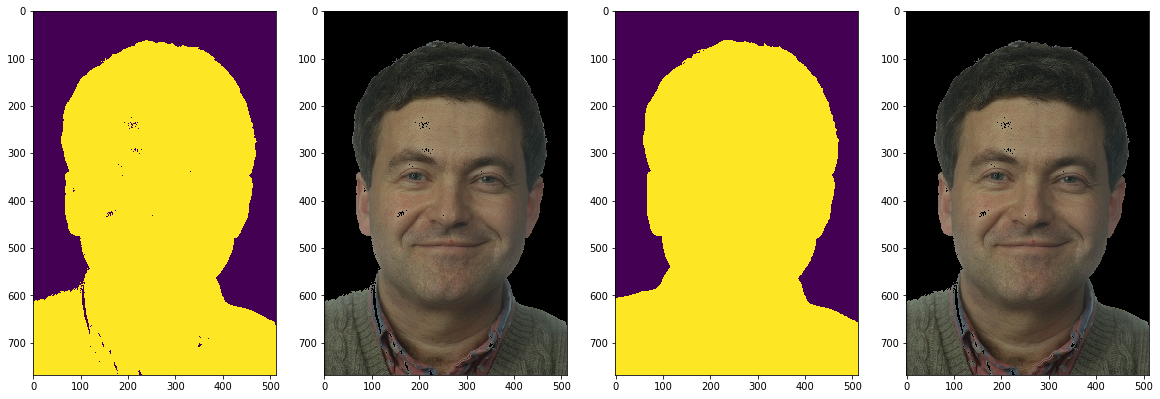

(768, 512)


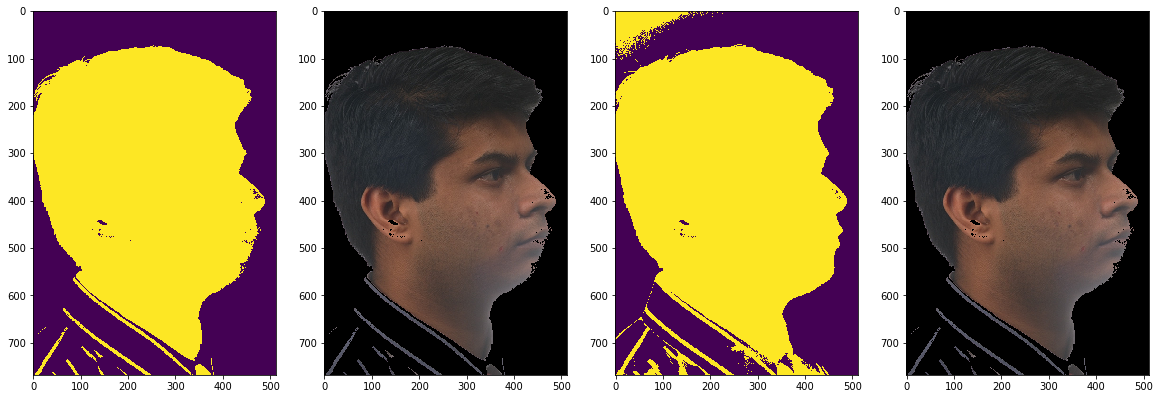

(768, 512)


/home/ali/anaconda3/lib/python3.6/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


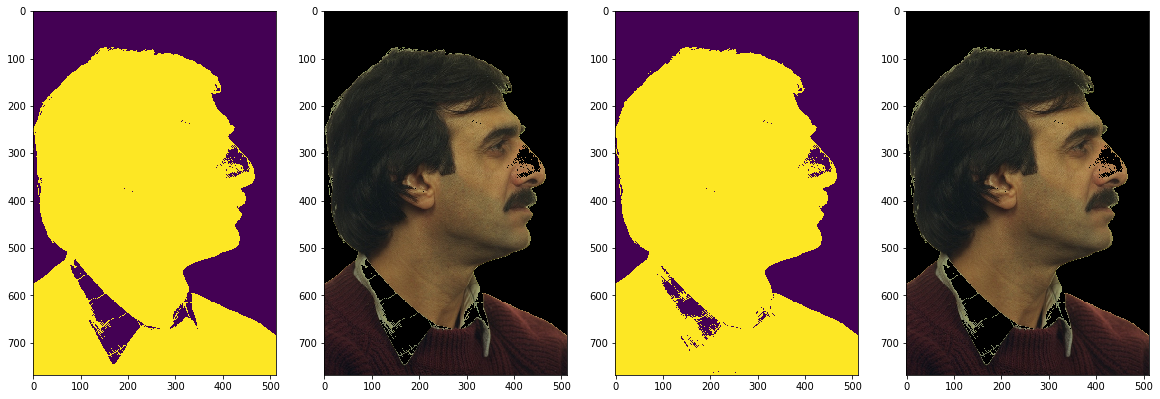

(768, 512)


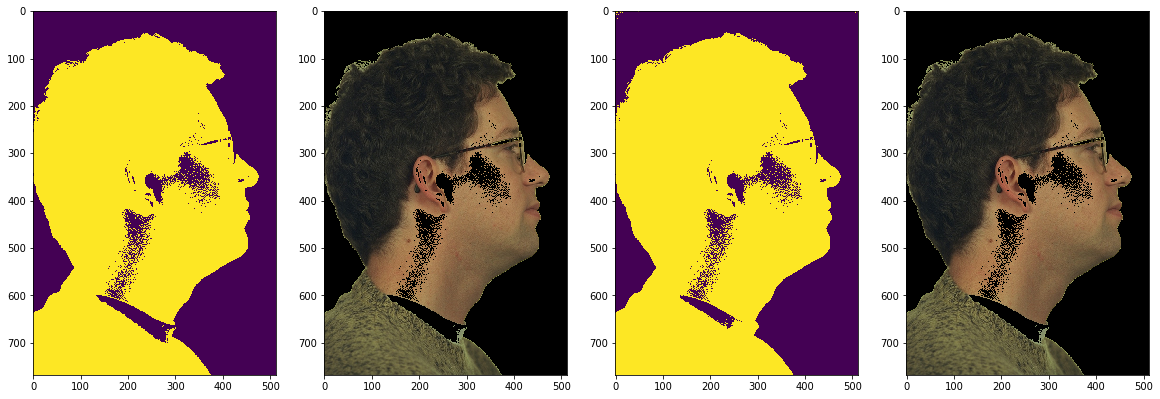

(768, 512)


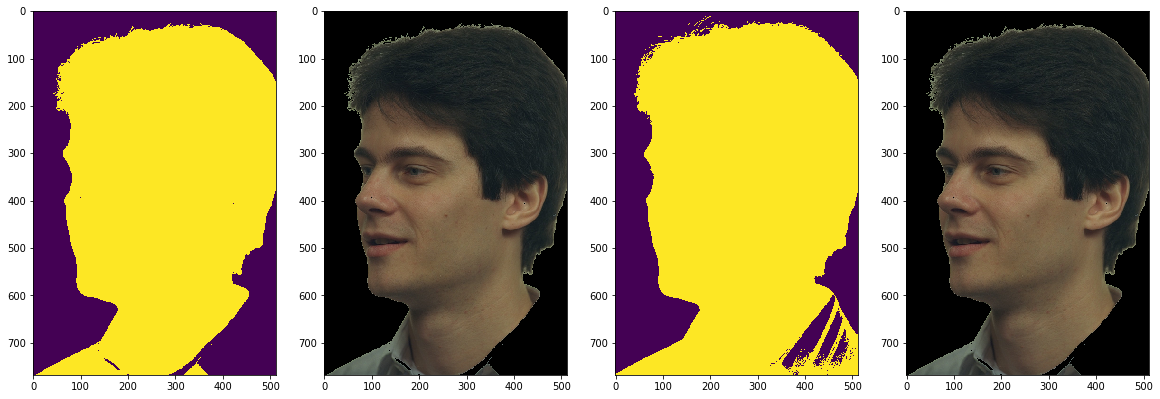

(768, 512)


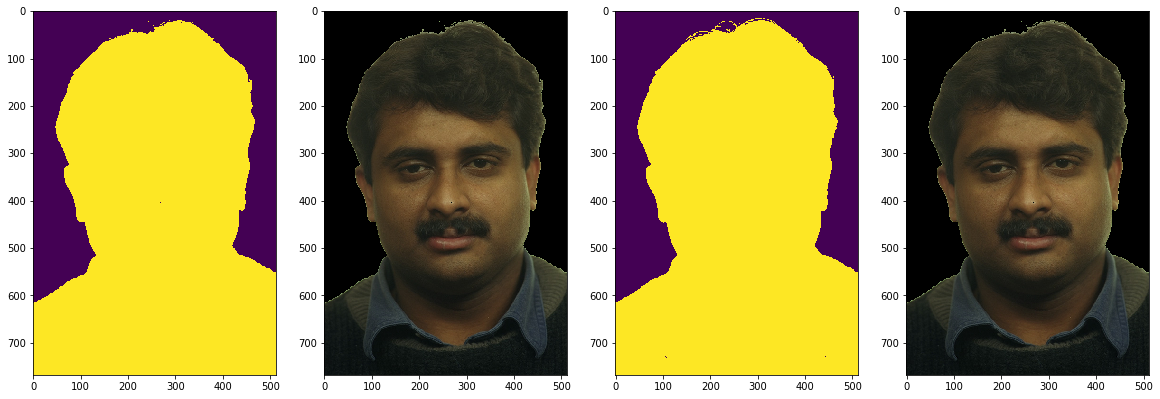

(768, 512)


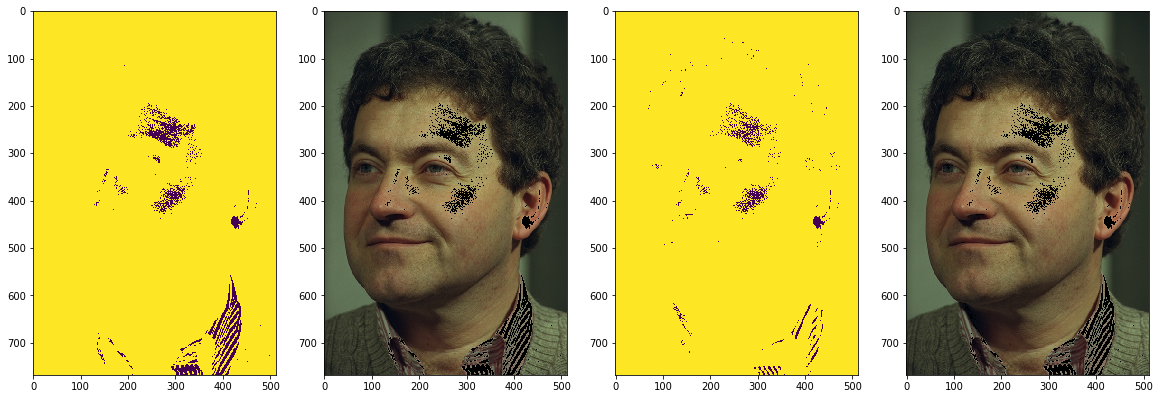

(768, 512)


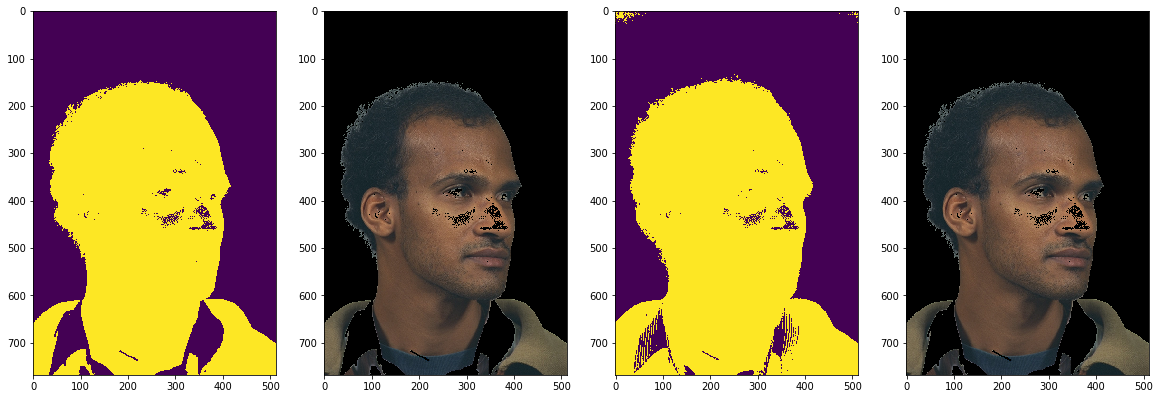

(768, 512)


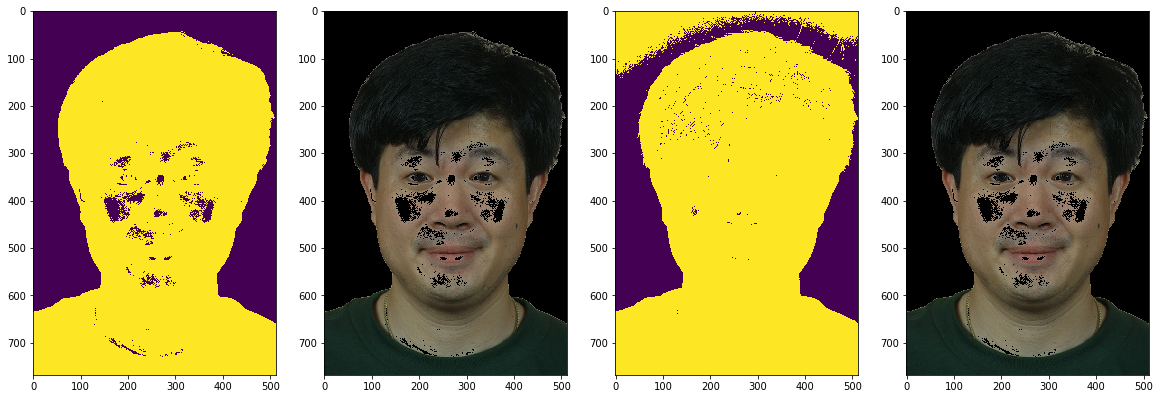

(768, 512)


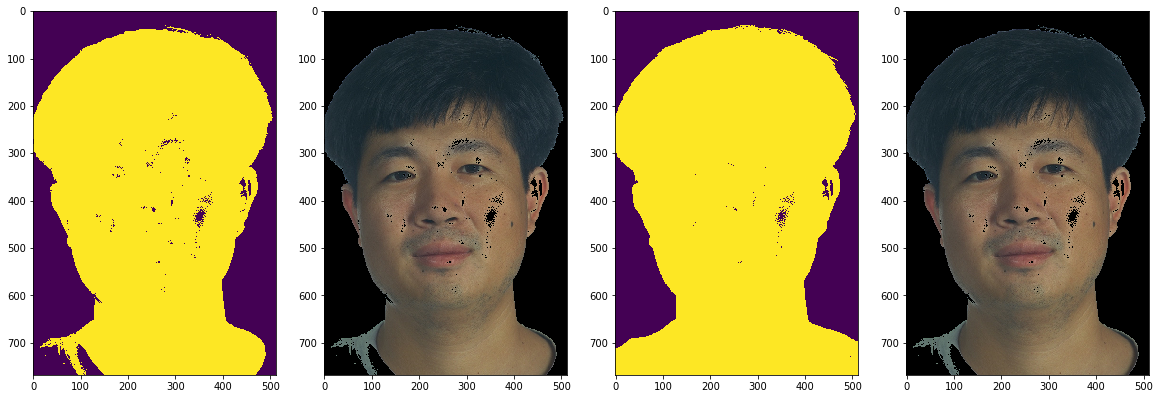

(768, 512)


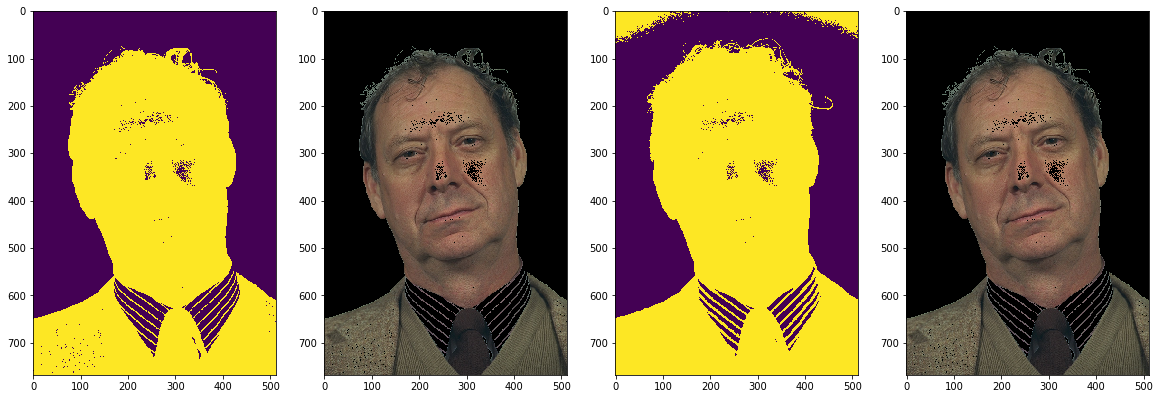

(768, 512)


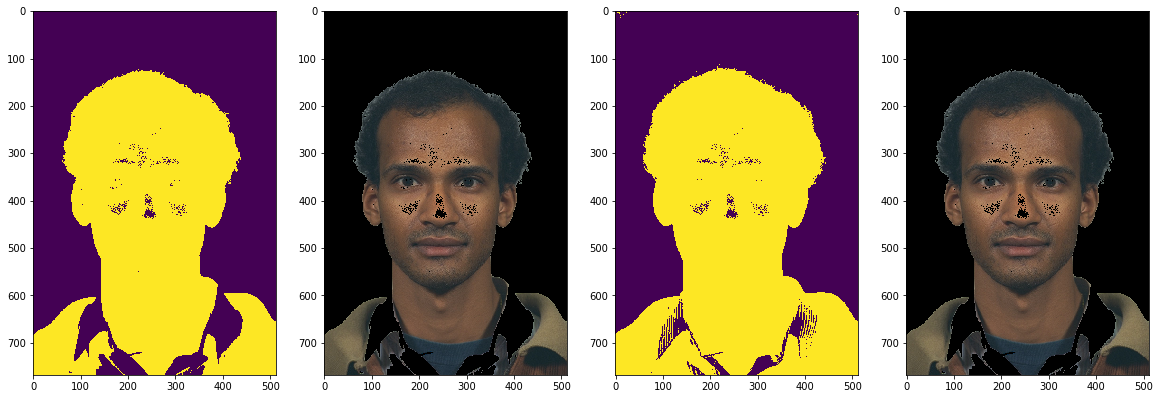

(768, 512)


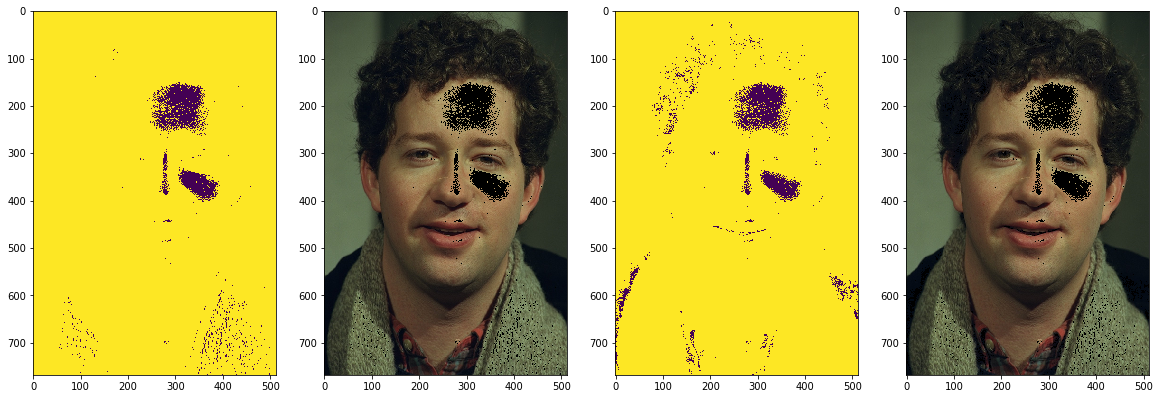

(768, 512)


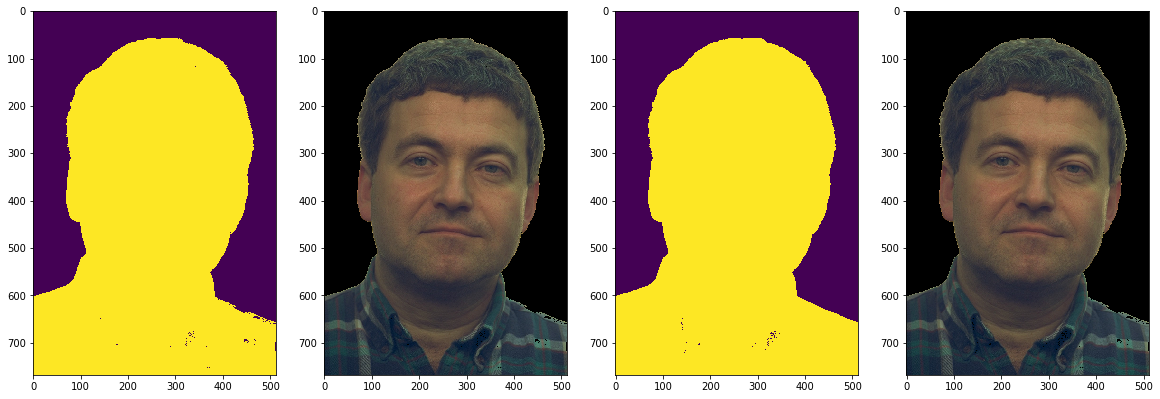

(768, 512)


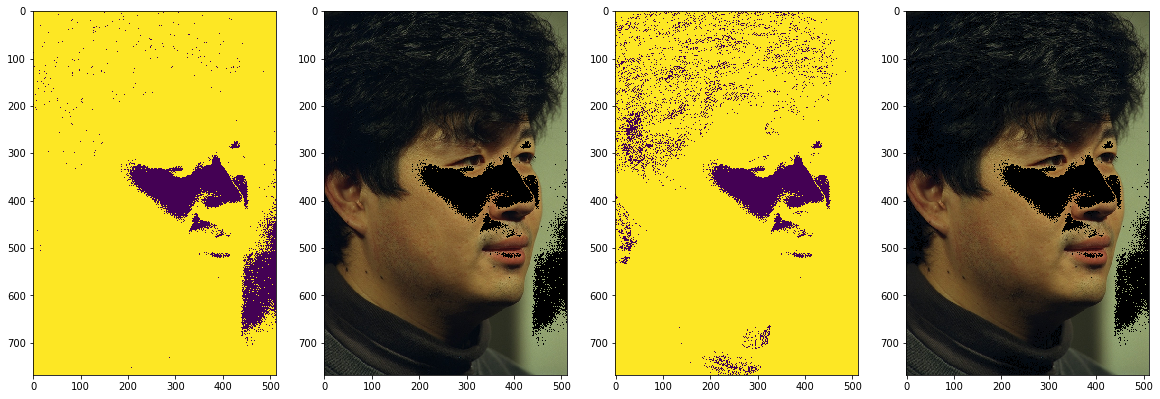

(768, 512)


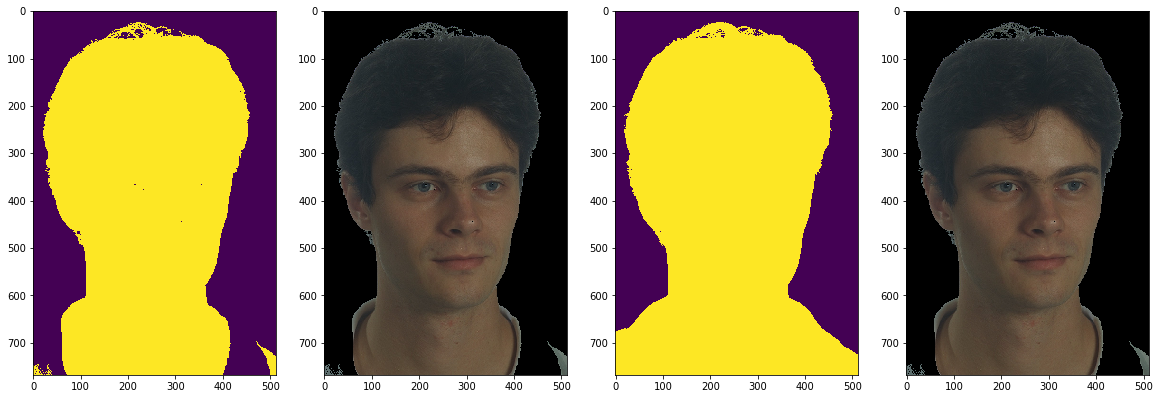

(768, 512)


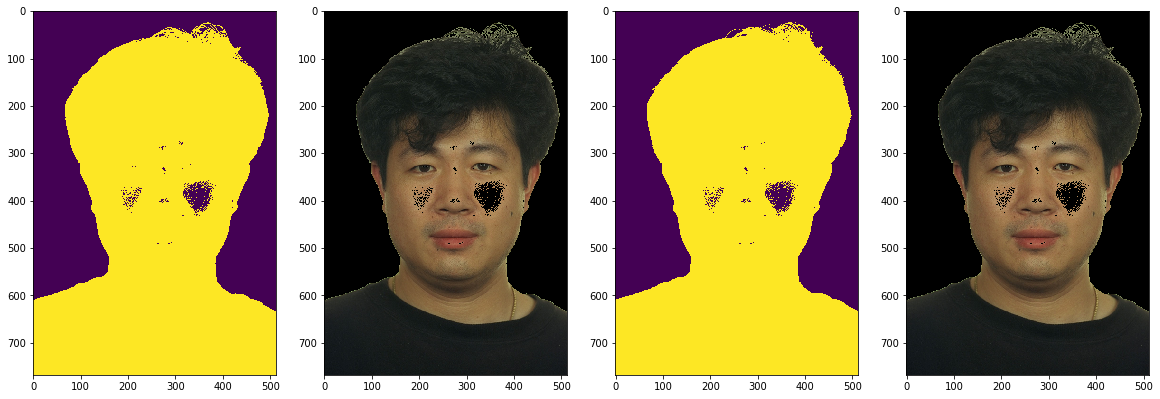

(768, 512)


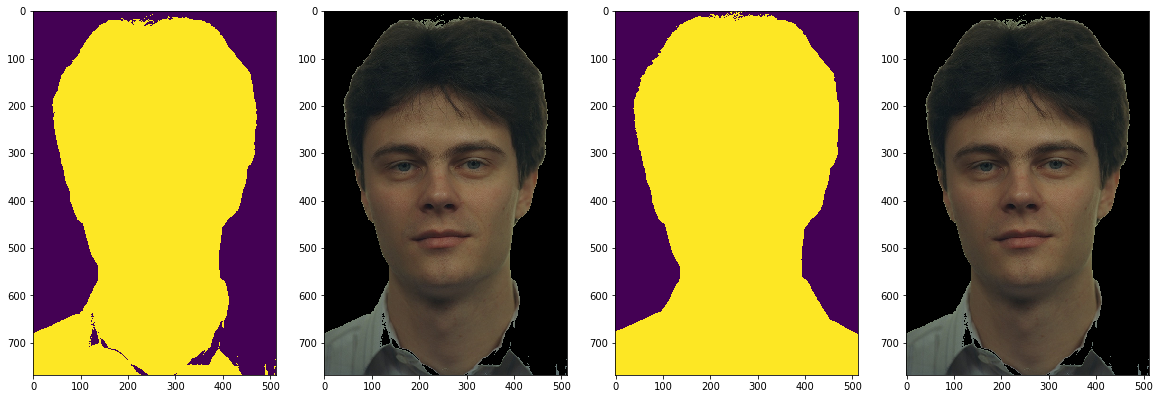

In [27]:
seg_skin()

Max bgr skin range [115 165 180]
Min bgr skin range [1 1 1]
Max hsv skin range [178 255 180]
Min hsv skin range [ 1 10  1]
(768, 512)


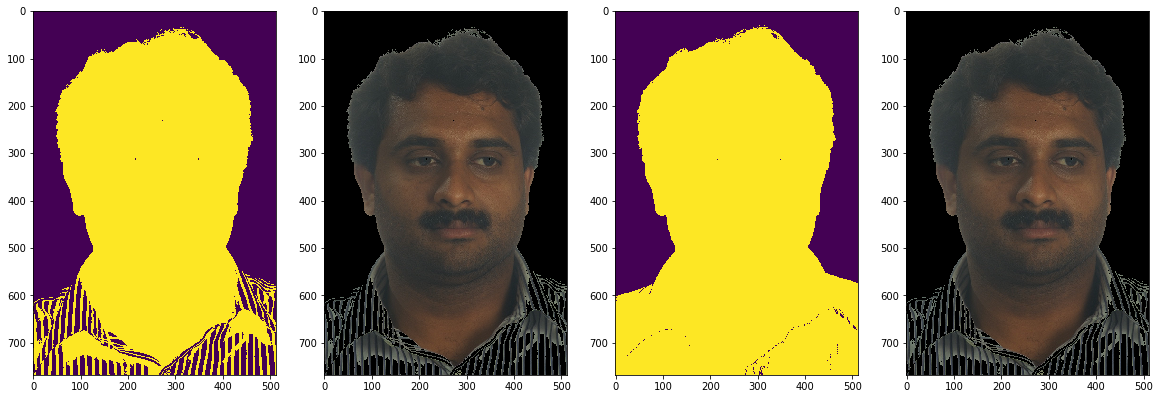

(768, 512)


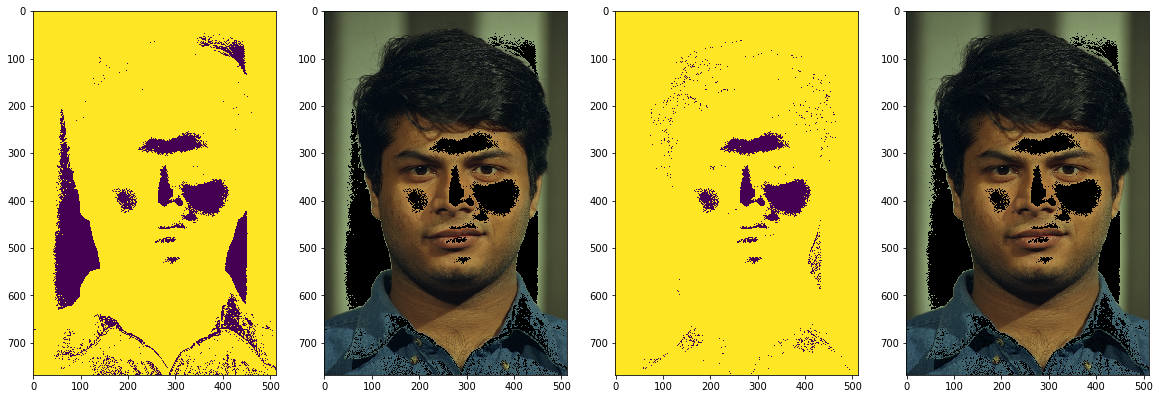

(768, 512)


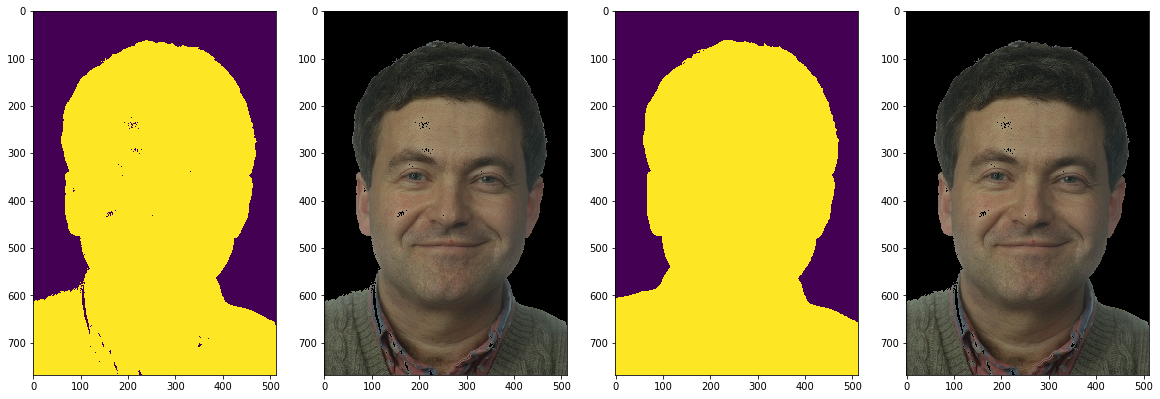

(768, 512)


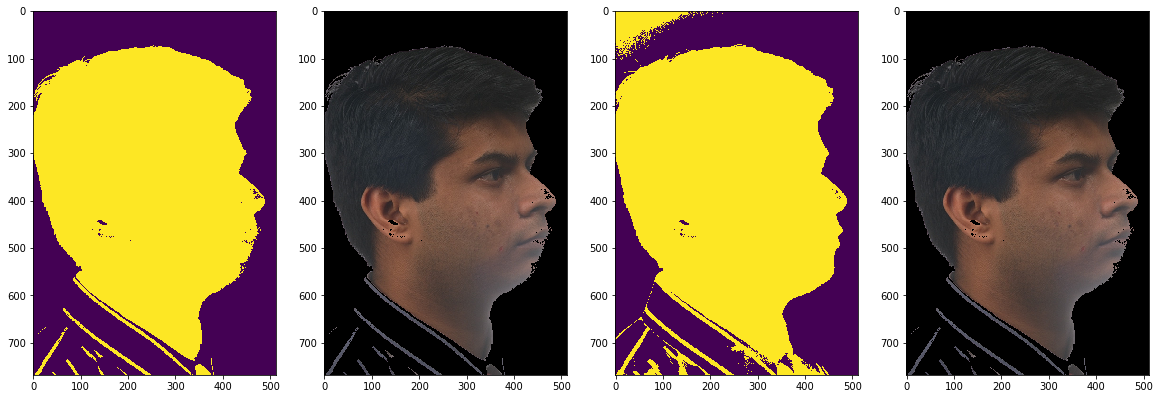

(768, 512)


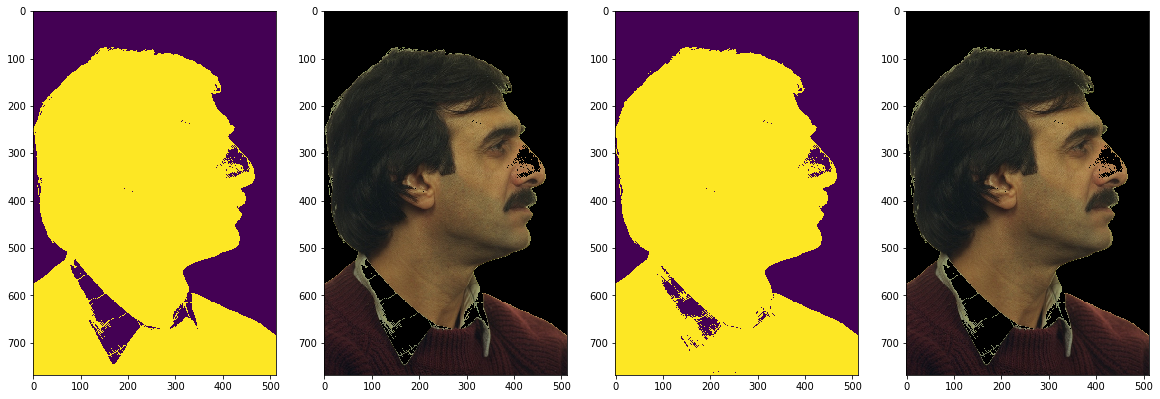

(768, 512)


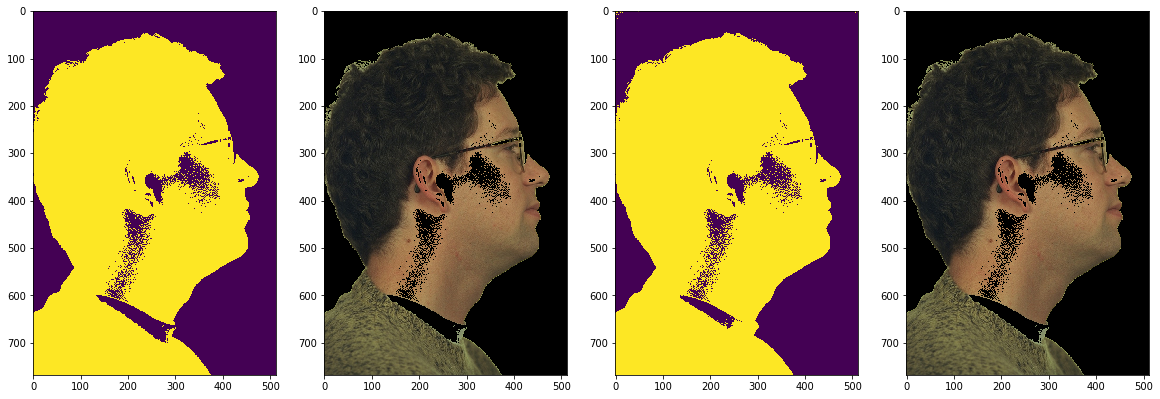

(768, 512)


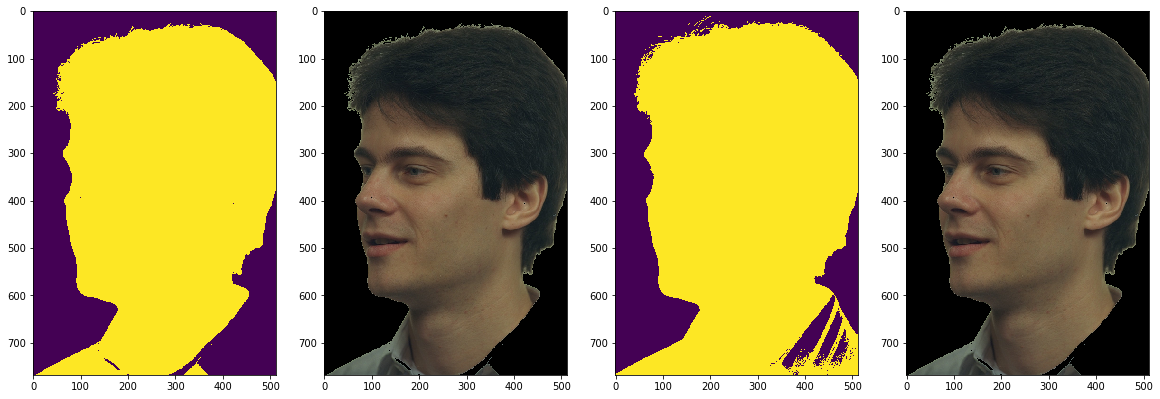

(768, 512)


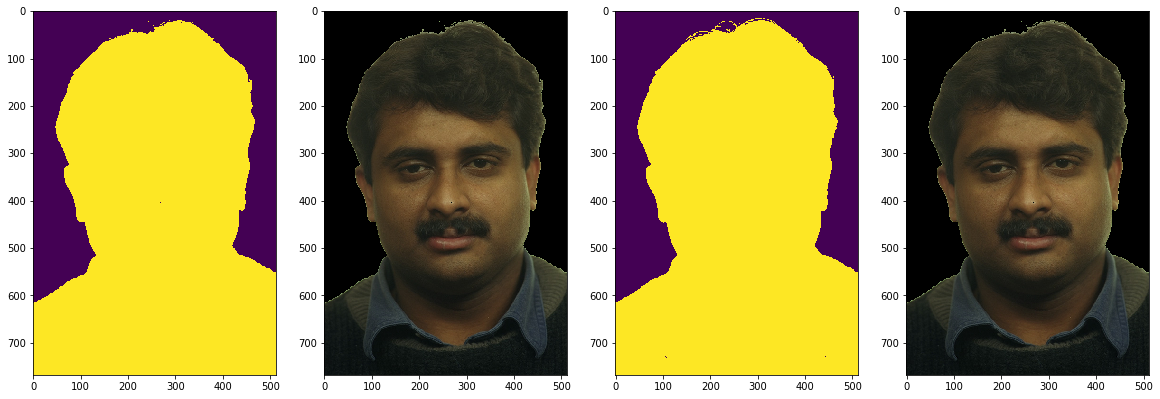

(768, 512)


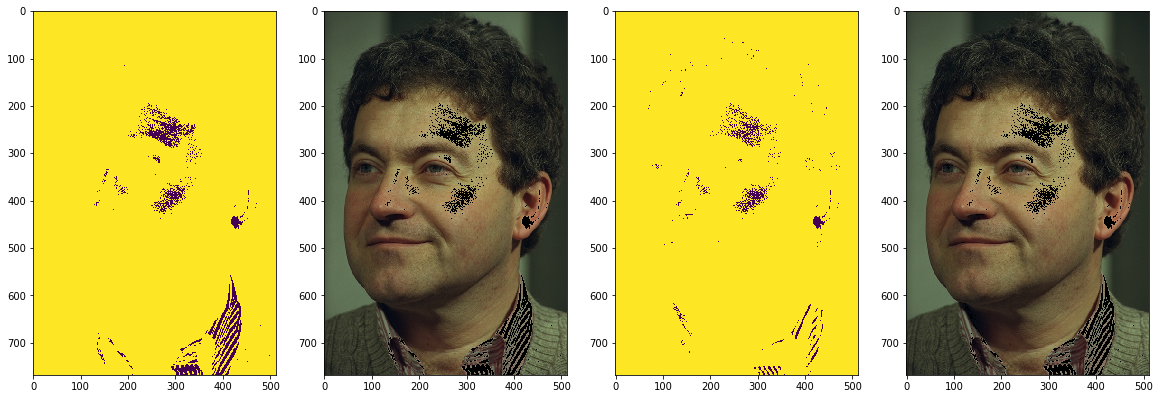

(768, 512)


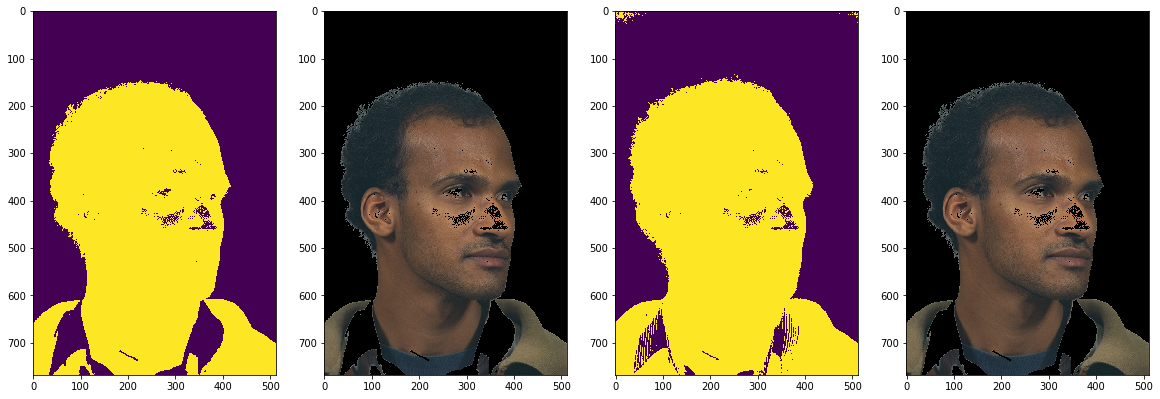

(768, 512)


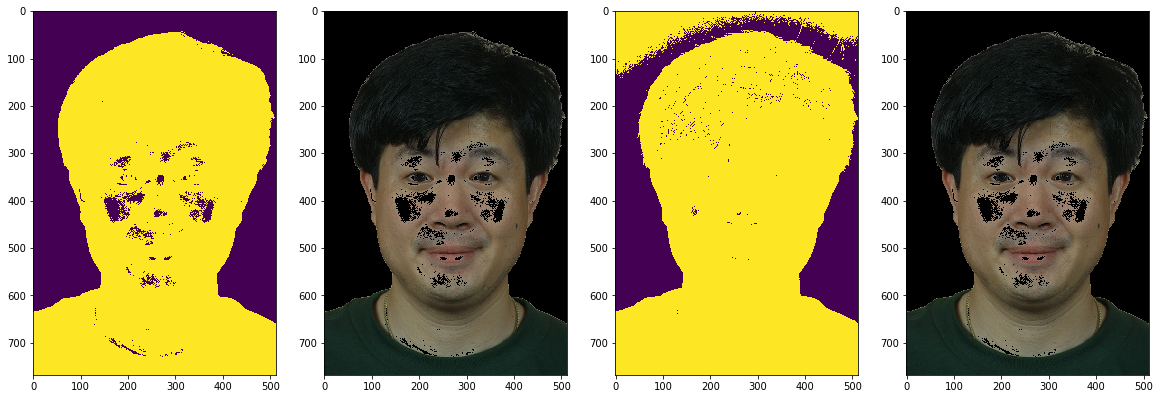

(768, 512)


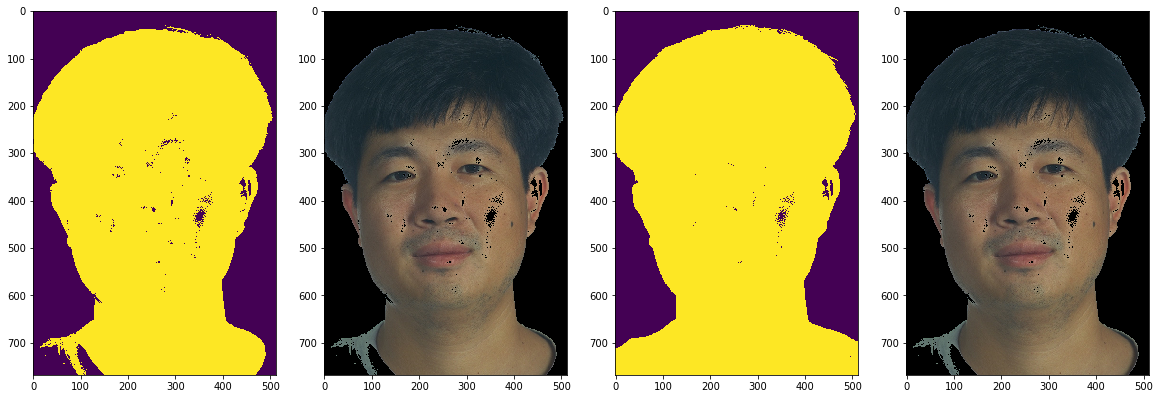

(768, 512)


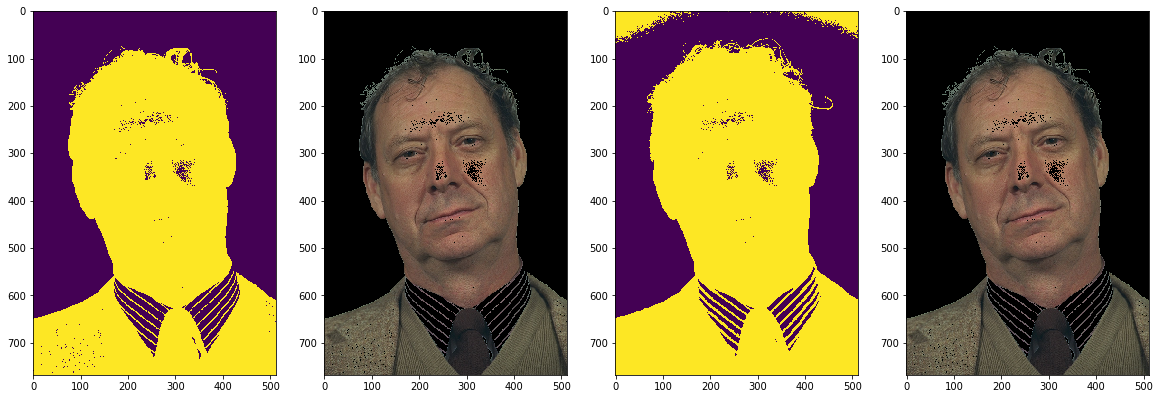

(768, 512)


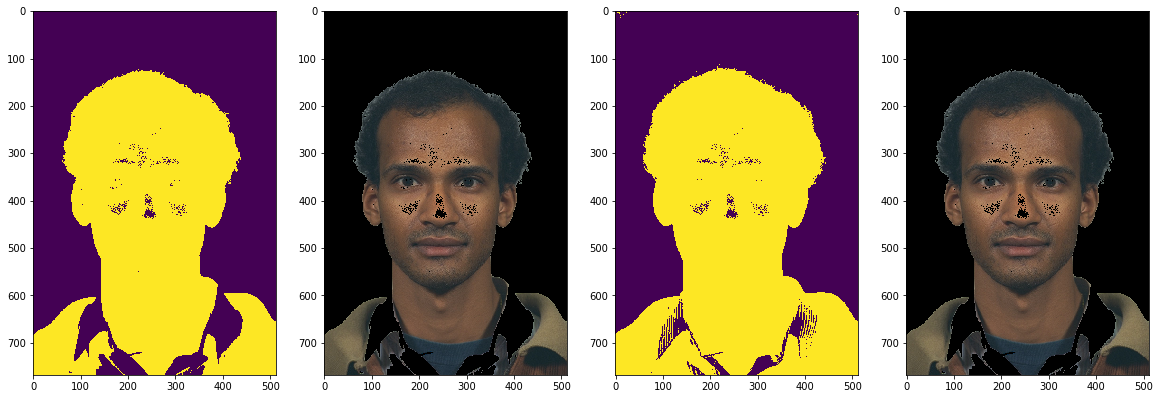

(768, 512)


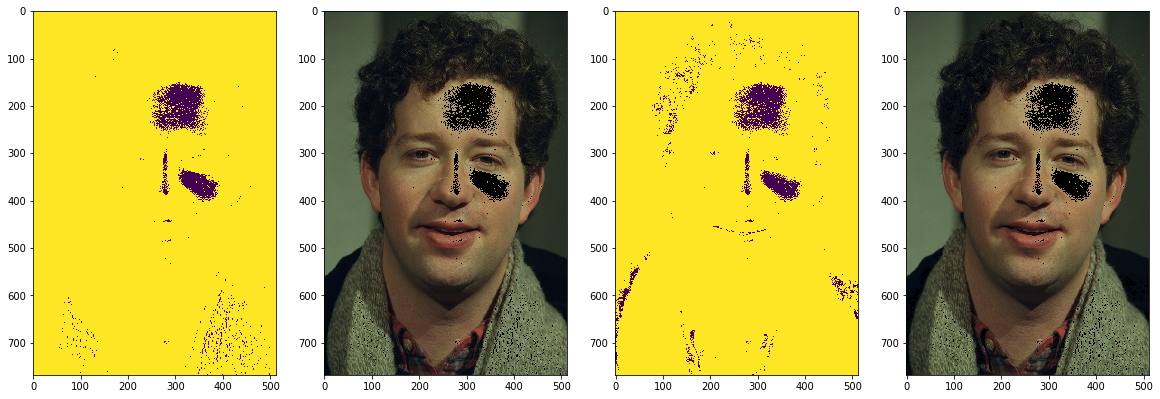

(768, 512)


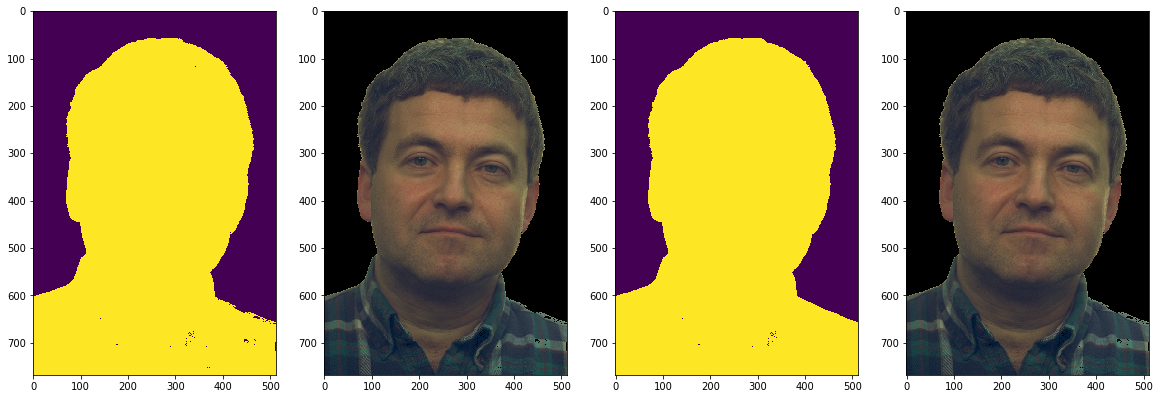

(768, 512)


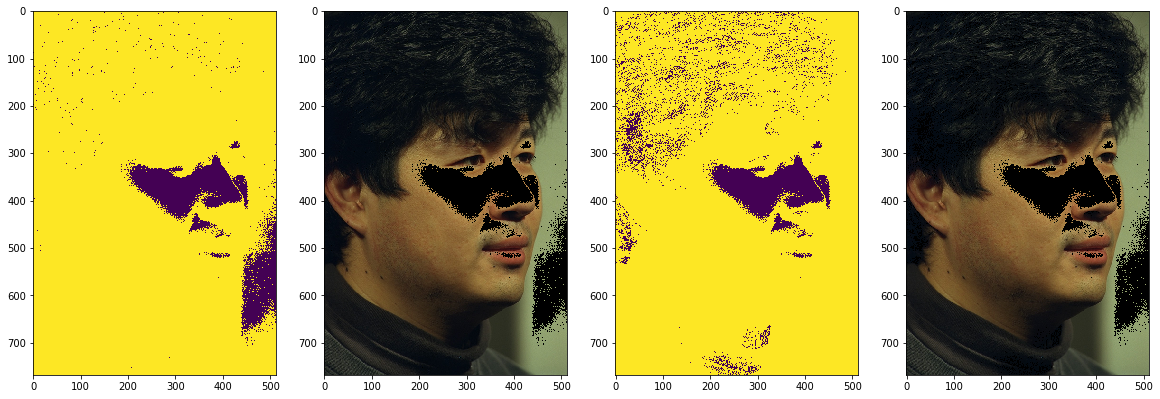

(768, 512)


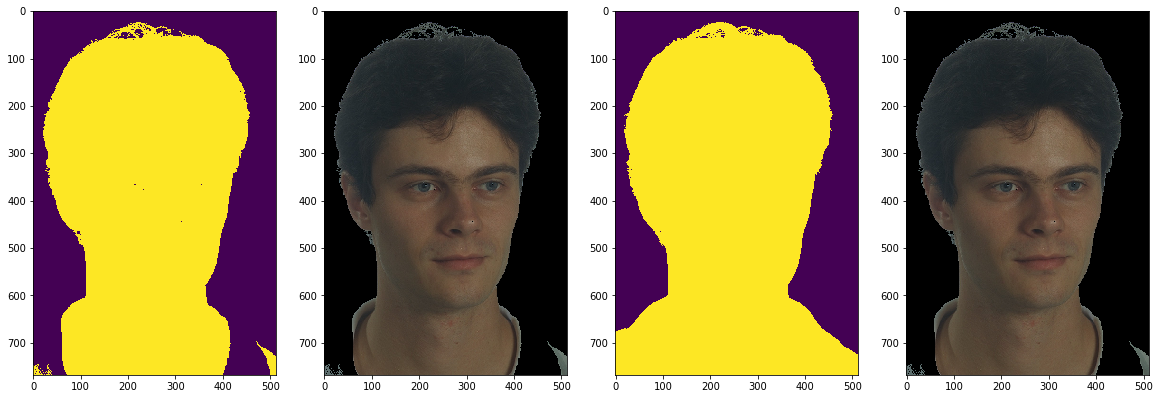

(768, 512)


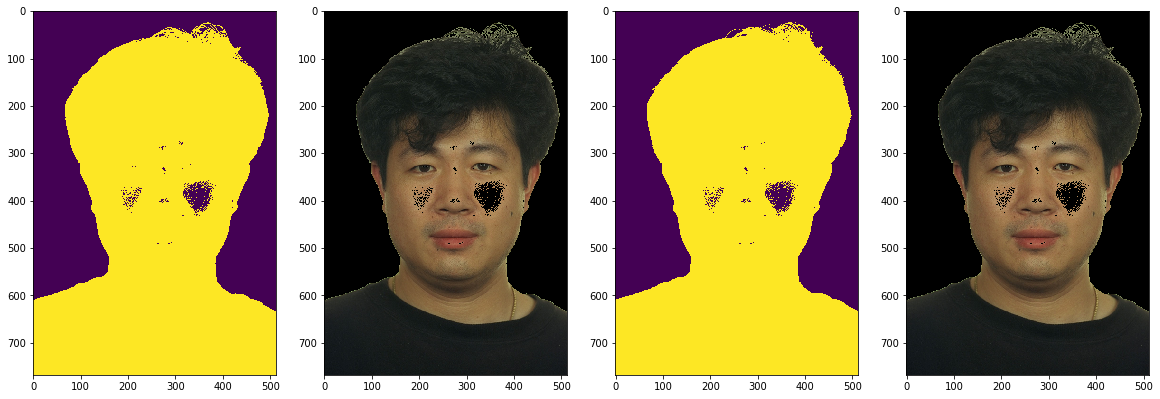

(768, 512)


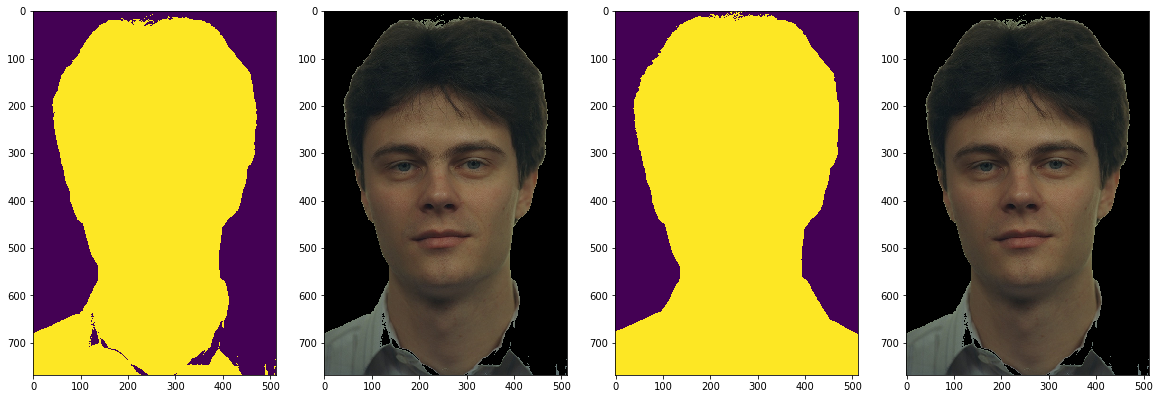

In [30]:
seg_skin("morph")